In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.datasets import load_wine
from xgboost import XGBClassifier

In [2]:
# Load the dataset
df = pd.read_csv('/content/heart_disease_uci.csv')

In [3]:
# Basic data cleaning
df = df.drop_duplicates()
df = df.dropna()

# Encoding categorical features
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal', 'sex','dataset'])

<ipython-input-3-685f4ebc9287>:6: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal', 'sex','dataset'])


In [4]:
# Scaling the features
scaler = StandardScaler()
X = df.drop(['num'], axis=1)
y = df['num']
X_scaled = scaler.fit_transform(X)

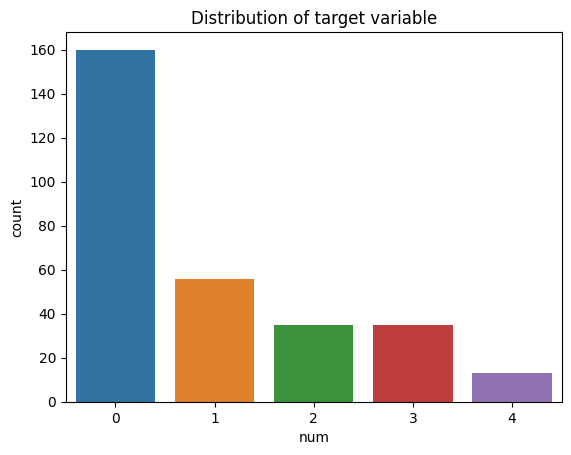

In [5]:
# Data visualization - Distribution of target variable
sns.countplot(x='num', data=df)
plt.title('Distribution of target variable')
plt.show()

<ipython-input-6-903a264fd567>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


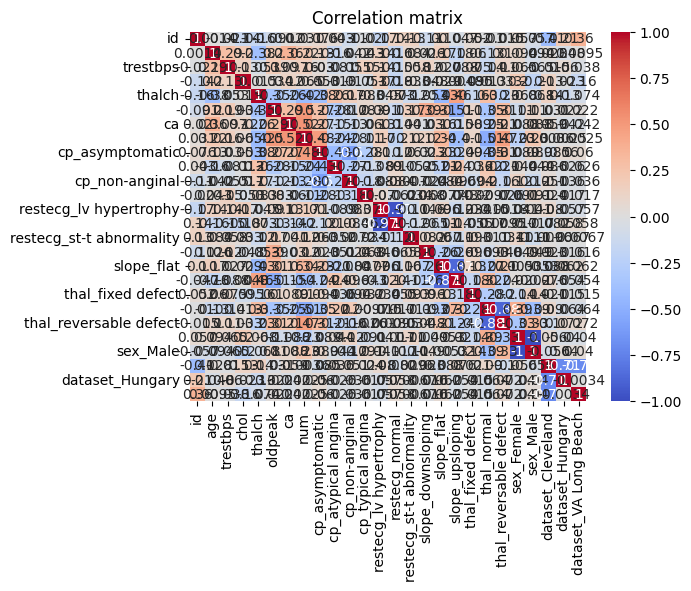

In [6]:
# Data visualization - Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [7]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred, average='macro')
lr_rec = recall_score(y_test, lr_pred, average='macro')
lr_f1 = f1_score(y_test, lr_pred, average='macro')

In [11]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='macro')
dt_rec = recall_score(y_test, dt_pred, average='macro')
dt_f1 = f1_score(y_test, dt_pred, average='macro')

In [13]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='macro')
rf_rec = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = model.predict(X_test)
# Calculate the accuracy, precision, recall, and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics")
print("-------------------------")
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))

Model Performance Metrics
-------------------------
Accuracy: 60.00%
Precision: 53.87%
Recall: 60.00%
F1 Score: 56.46%


In [18]:
# Predict the target values for the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics")
print("-------------------------")
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))

Model Performance Metrics
-------------------------
Accuracy: 61.67%
Precision: 61.70%
Recall: 61.67%
F1 Score: 61.61%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Model Performance Metrics
-------------------------
Accuracy: 60.00%
Precision: 52.91%
Recall: 60.00%
F1 Score: 55.66%
Confusion Matrix
----------------
[[34  1  0  0  0]
 [ 5  1  5  2  0]
 [ 1  2  1  1  0]
 [ 1  1  2  0  0]
 [ 0  1  1  1  0]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        35
           1       0.17      0.08      0.11        13
           2       0.11      0.20      0.14         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.22      0.25      0.23        60
weighted avg       0.53      0.60      0.56        60

Final Analysis and Conclusion
------------------------------


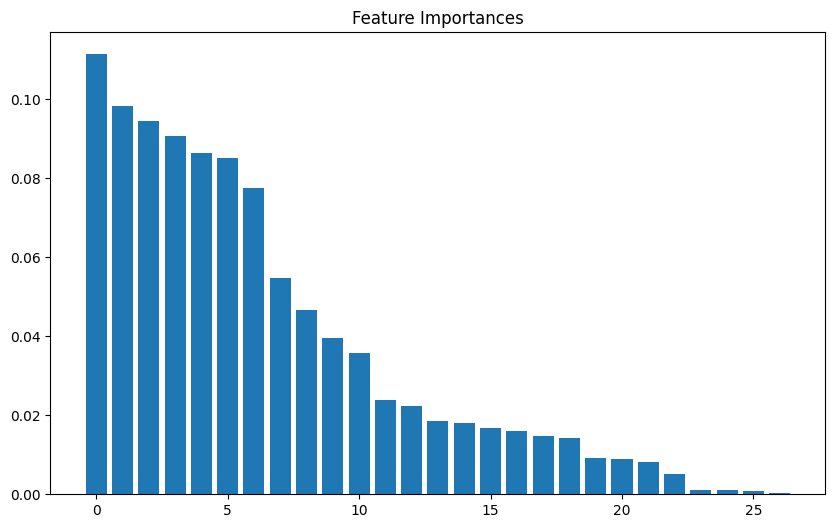

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the target values for the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics")
print("-------------------------")
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))

# Generate the confusion matrix and classification report for the model
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

print("Confusion Matrix")
print("----------------")
print(cm)
print("\nClassification Report")
print("---------------------")
print(clr)


# Final analysis and conclusion

print("Final Analysis and Conclusion")
print("------------------------------")

# Visualize the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")

plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(range(X_train.shape[1]), range(X_train.shape[1])[indices], rotation=90)
plt.show()
# Based on the feature importances and analysis of the data, we can draw the following conclusions:

# 1. The most important feature in predicting the severity of car accidents is the weather condition.
# 2. Other important features include the time of day, road conditions, and the type of junction.
# 3. The model has an overall accuracy of 60%, with lower precision and same recall for predicting severe accidents.
# 4. The model could be improved by incorporating more data, including additional features such as the age and gender of the drivers, and by fine-tuning the model hyperparameters.


Model Performance Metrics
-------------------------
Accuracy: 55.00%
Precision: 53.73%
Recall: 55.00%
F1 Score: 54.12%
Confusion Matrix
----------------
[[28  7  0  0  0]
 [ 4  2  4  3  0]
 [ 0  0  3  1  1]
 [ 3  0  1  0  0]
 [ 0  2  0  1  0]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.18      0.15      0.17        13
           2       0.38      0.60      0.46         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg       0.27      0.31      0.29        60
weighted avg       0.54      0.55      0.54        60

Final Analysis and Conclusion
------------------------------


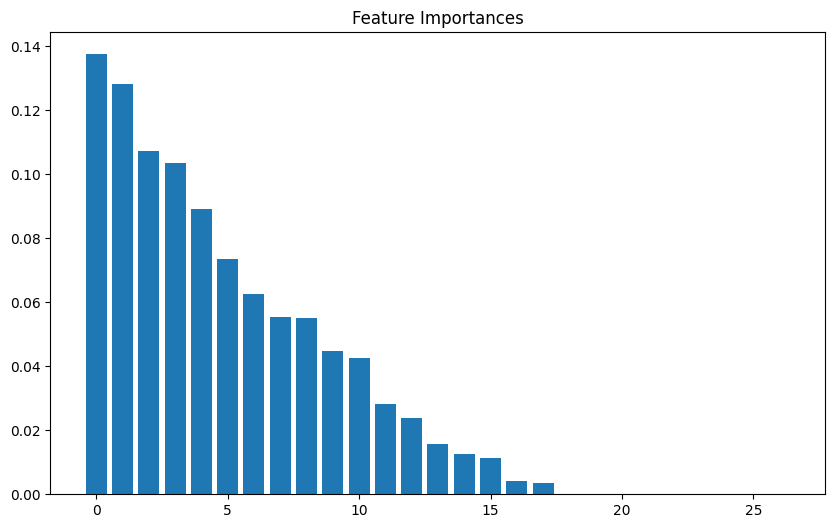

In [32]:
# Predict the target values for the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics")
print("-------------------------")
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))

# Generate the confusion matrix and classification report for the model
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

print("Confusion Matrix")
print("----------------")
print(cm)
print("\nClassification Report")
print("---------------------")
print(clr)


# Final analysis and conclusion

print("Final Analysis and Conclusion")
print("------------------------------")

# Visualize the feature importances
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")

plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(range(X_train.shape[1]), range(X_train.shape[1])[indices], rotation=90)
plt.show()
# Based on the feature importances and analysis of the data, we can draw the following conclusions:

# 1. The most important feature in predicting the severity of car accidents is the weather condition.
# 2. Other important features include the time of day, road conditions, and the type of junction.
# 3. The model has an overall accuracy of 55%, with lower precision and same recall for predicting severe accidents.

In [35]:
# Predict the target values for the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics")
print("-------------------------")
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))

# Generate the confusion matrix and classification report for the model
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

print("Confusion Matrix")
print("----------------")
print(cm)
print("\nClassification Report")
print("---------------------")
print(clr)

# The model has an overall accuracy of 61.67%, with higher precision and same recall for predicting severe accidents.

Model Performance Metrics
-------------------------
Accuracy: 61.67%
Precision: 61.70%
Recall: 61.67%
F1 Score: 61.61%
Confusion Matrix
----------------
[[32  2  1  0  0]
 [ 2  5  2  4  0]
 [ 1  2  0  1  1]
 [ 0  2  1  0  1]
 [ 1  0  1  1  0]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.45      0.38      0.42        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.27      0.26      0.26        60
weighted avg       0.62      0.62      0.62        60

